In [6]:
import cv2
import matplotlib.pyplot as plt
import albumentations as A

In [2]:
input_img ='1.jpg'

In [ ]:
transform = A.Compose([
    ## brightness, contrast
    A.RandomBrightnessContrast(always_apply=True, p=1.0, brightness_limit=(-0.4, 0.4), contrast_limit=(-0.4, 0.4), brightness_by_max=False),
    ## rotation
    A.SafeRotate(always_apply=True, p=1.0, limit=(-10, 10), interpolation=2, border_mode=0, value=(0, 0, 0), mask_value=None),
    ## noise
    A.GaussNoise(always_apply=True, p=1.0, var_limit=(100.0, 200.0)),
    ## colorjitter
    A.ColorJitter (always_apply=True ,brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2, p=0.5)
])

In [5]:
BrightnessContrast =A.Compose([
    ## brightness, contrast
    A.RandomBrightnessContrast(always_apply=True, p=1.0, brightness_limit=(-0.4, 0.4), contrast_limit=(-0.4, 0.4), brightness_by_max=False)
])
SafeRotate =A.Compose([
    ## rotation
    A.SafeRotate(always_apply=True, p=1.0, limit=(-10, 10), interpolation=2, border_mode=0, value=(0, 0, 0), mask_value=None)
])
GaussNoise =A.Compose([
    ## noise
    A.GaussNoise(always_apply=True, p=1.0, var_limit=(100.0, 200.0))
])
ColorJitter =A.Compose([
     ## colorjitter
    A.ColorJitter (always_apply=True ,brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2, p=0.5)
])
origin = A.Compose([
    A.Resize(height = 400, width = 256)
])

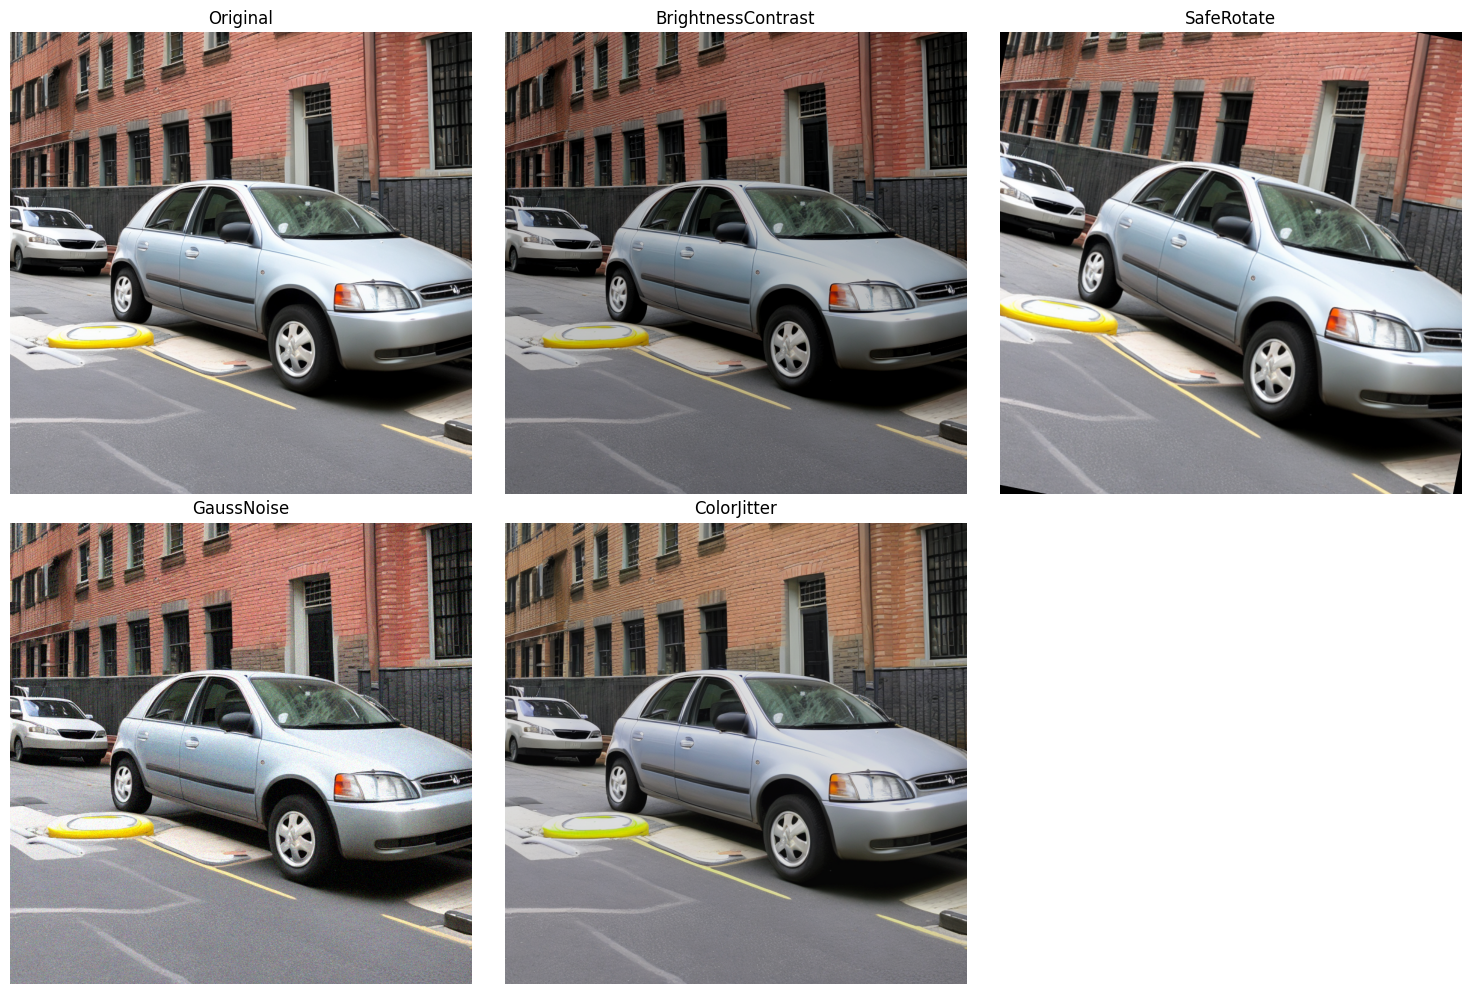

In [13]:
# Load an image
image_path = './data/generated_img/samples1/00000.png'  # Replace with your image path
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

# Define transformations
transformations = {
    'Original': A.Compose([A.Resize(height=768, width=768)]),
    'BrightnessContrast': A.Compose([
        A.RandomBrightnessContrast(always_apply=True, p=1.0, brightness_limit=(-0.4, 0.4), contrast_limit=(-0.4, 0.4), brightness_by_max=False)
    ]),
    'SafeRotate': A.Compose([
        A.Compose([A.Resize(height=1024, width=1024)]),
        A.SafeRotate(always_apply=True, p=1.0, limit=(-20, 20), interpolation=2, border_mode=0, value=(0, 0, 0), mask_value=None),
        A.CenterCrop(always_apply=True, p=1.0, height=768, width=768)
    ]),
    'GaussNoise': A.Compose([
        A.GaussNoise(always_apply=True, p=1.0, var_limit=(100.0, 200.0))
    ]),
    'ColorJitter': A.Compose([
        A.ColorJitter(always_apply=True, brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2, p=0.5)
    ])
}

# Apply transformations and store results
transformed_images = {name: transform(image=image)['image'] for name, transform in transformations.items()}

# Visualization
plt.figure(figsize=(15, 10))
for i, (name, transformed_image) in enumerate(transformed_images.items(), 1):
    plt.subplot(2, 3, i)
    plt.imshow(transformed_image)
    plt.title(name)
    plt.axis('off')

plt.tight_layout()
plt.show()
